# Subplots Layout and GridSpec for Complex Arrangements

### What are Subplots and GridSpec?

When working with visualizations, it’s often necessary to **show multiple plots in a single figure**. Instead of creating many separate charts, we can use **subplots** to compare trends side by side in one unified view. This is very important in **data analysis and AI/ML**, where we need to analyze relationships between variables simultaneously.

- **Subplots**: A subplot is one small plot within a larger figure. Matplotlib’s `plt.subplots()` is the most common way to arrange them in simple **rows and columns**. For example, a `2×2` subplot grid creates 4 charts inside one figure.
- **GridSpec**: When layouts become more complex (e.g., one plot spanning two rows, another taking one column), we use **GridSpec**, which gives fine control over how subplots are positioned.

### Why is this important?

In practice:

- Data scientists often need to display **multiple metrics together** (accuracy, loss, confusion matrix).
- Business analysts visualize **different KPIs** (sales, profit, discounts) in one dashboard.
- Researchers compare **models or parameters side by side**.

Thus, subplot layouts and GridSpec let us **organize plots like dashboards** for better storytelling and interpretation.

**Examples**

1. Basic Subplots with `plt.subplots()`

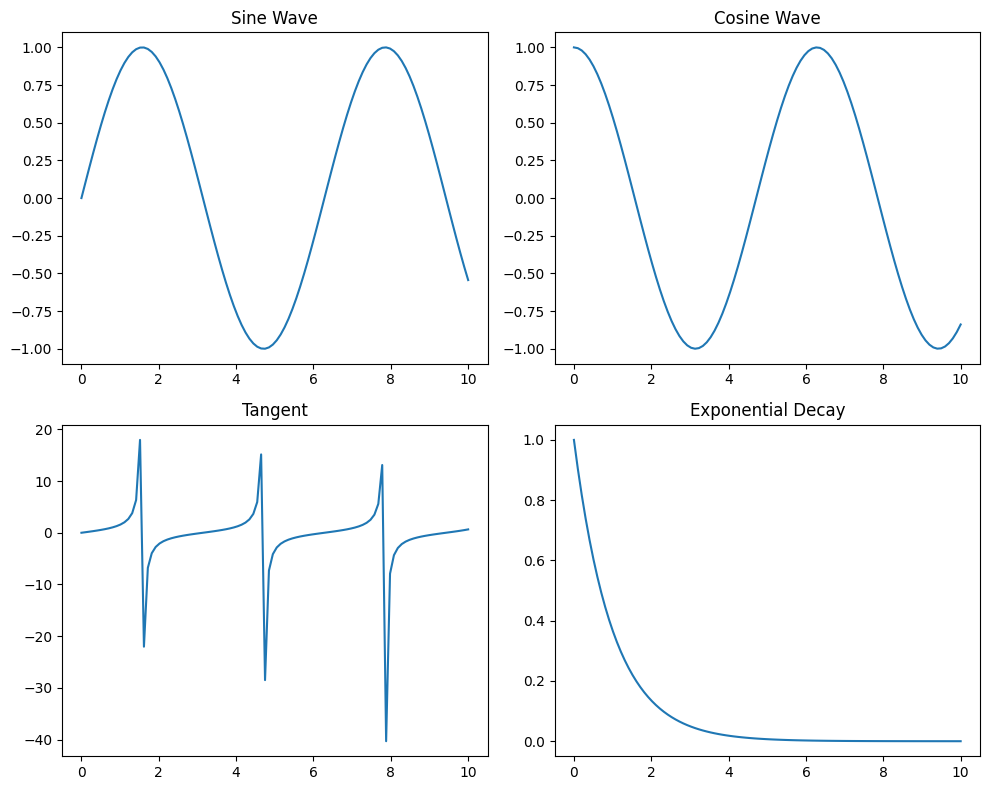

In [1]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 100)

fig, axs = plt.subplots(2, 2, figsize=(10,8))

axs[0,0].plot(x, np.sin(x))
axs[0,0].set_title("Sine Wave")

axs[0,1].plot(x, np.cos(x))
axs[0,1].set_title("Cosine Wave")

axs[1,0].plot(x, np.tan(x))
axs[1,0].set_title("Tangent")

axs[1,1].plot(x, np.exp(-x))
axs[1,1].set_title("Exponential Decay")

plt.tight_layout()
plt.show()

2. Complex Layout with **GridSpec**

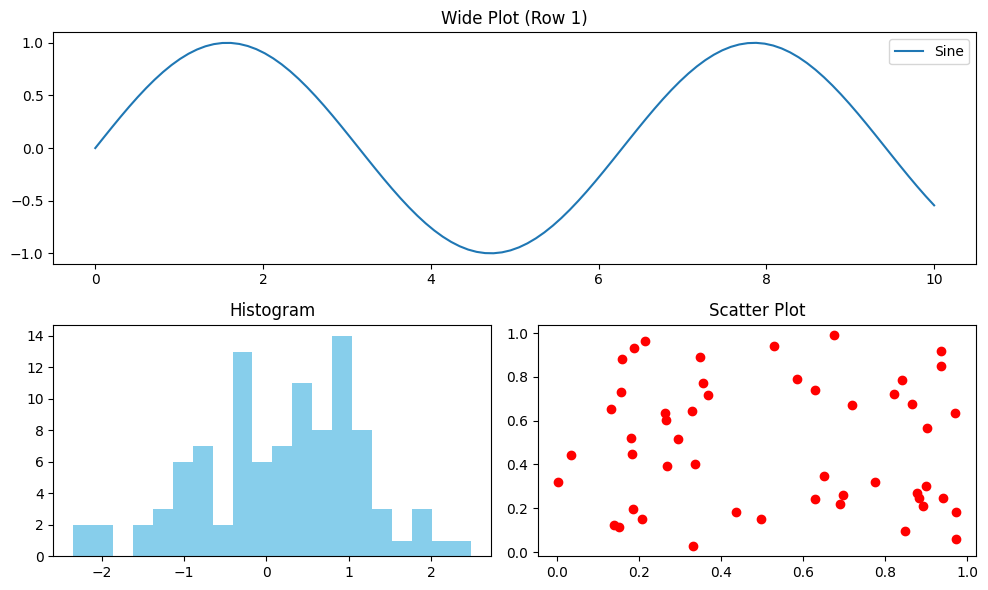

In [2]:
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(10,6))
gs = gridspec.GridSpec(2, 2, figure=fig)

# Large plot spanning two columns
ax1 = fig.add_subplot(gs[0, :])
ax1.plot(x, np.sin(x), label="Sine")
ax1.set_title("Wide Plot (Row 1)")
ax1.legend()

# Two smaller plots below
ax2 = fig.add_subplot(gs[1, 0])
ax2.hist(np.random.randn(100), bins=20, color="skyblue")
ax2.set_title("Histogram")

ax3 = fig.add_subplot(gs[1, 1])
ax3.scatter(np.random.rand(50), np.random.rand(50), color="red")
ax3.set_title("Scatter Plot")

plt.tight_layout()
plt.show()

### Exercises

Q1. Create a 1×3 subplot layout showing Sales, Profit, and Quantity histograms.

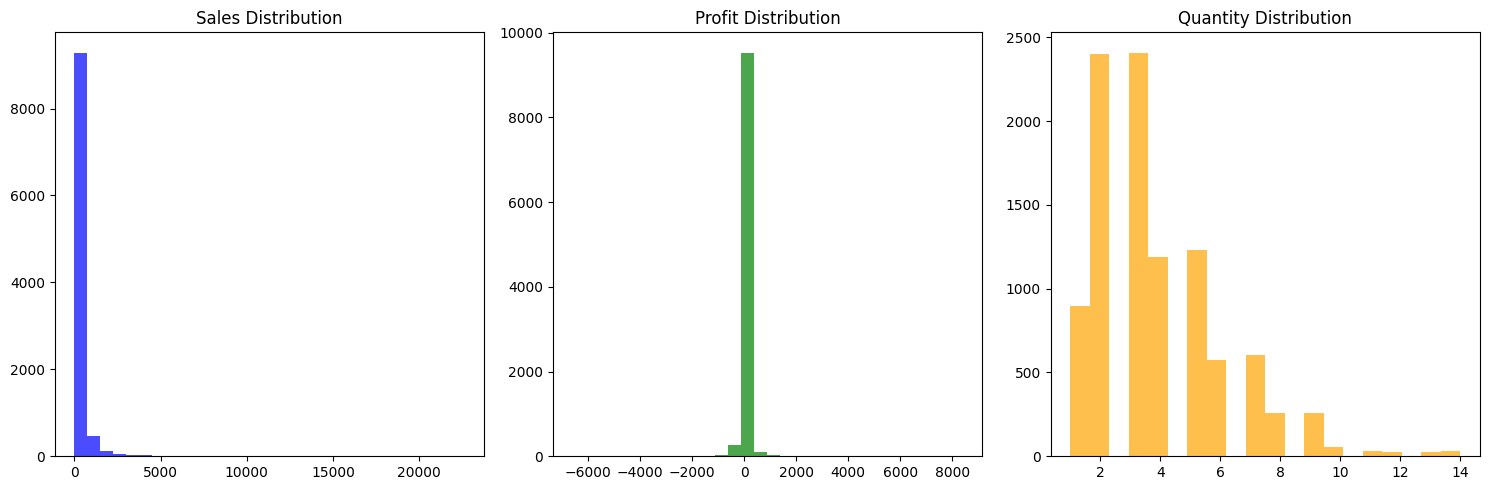

In [3]:
import pandas as pd

df = pd.read_csv("data/Superstore.csv", encoding='latin-1')

fig, axs = plt.subplots(1, 3, figsize=(15,5))

axs[0].hist(df["Sales"], bins=30, color="blue", alpha=0.7)
axs[0].set_title("Sales Distribution")

axs[1].hist(df["Profit"], bins=30, color="green", alpha=0.7)
axs[1].set_title("Profit Distribution")

axs[2].hist(df["Quantity"], bins=20, color="orange", alpha=0.7)
axs[2].set_title("Quantity Distribution")

plt.tight_layout()
plt.show()

Q2. Use GridSpec to make one plot spanning the full top row and two plots in the bottom row.

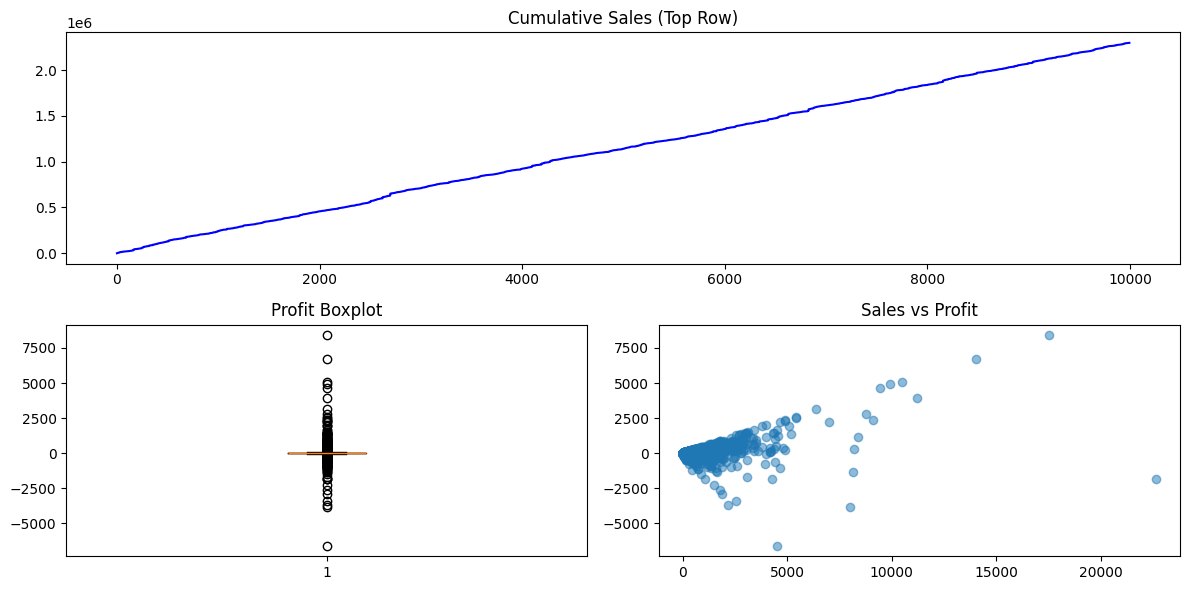

In [4]:
fig = plt.figure(figsize=(12,6))
gs = gridspec.GridSpec(2, 2, figure=fig)

ax1 = fig.add_subplot(gs[0, :])
ax1.plot(df["Sales"].cumsum(), color="blue")
ax1.set_title("Cumulative Sales (Top Row)")

ax2 = fig.add_subplot(gs[1, 0])
ax2.boxplot(df["Profit"])
ax2.set_title("Profit Boxplot")

ax3 = fig.add_subplot(gs[1, 1])
ax3.scatter(df["Sales"], df["Profit"], alpha=0.5)
ax3.set_title("Sales vs Profit")

plt.tight_layout()
plt.show()

Q3. Create a 2×2 grid where one subplot is empty.

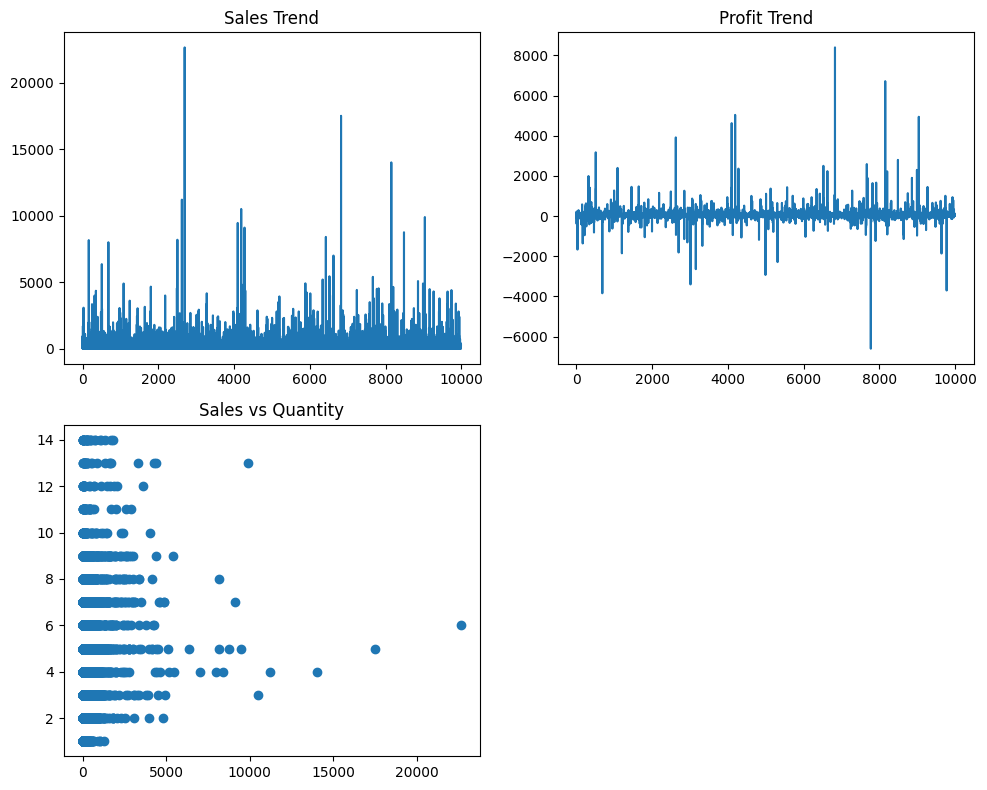

In [5]:
fig, axs = plt.subplots(2, 2, figsize=(10,8))

axs[0,0].plot(df["Sales"])
axs[0,0].set_title("Sales Trend")

axs[0,1].plot(df["Profit"])
axs[0,1].set_title("Profit Trend")

axs[1,0].scatter(df["Sales"], df["Quantity"])
axs[1,0].set_title("Sales vs Quantity")

fig.delaxes(axs[1,1])  # remove last subplot
plt.tight_layout()
plt.show()

Q4. Build a 3×2 subplot grid of small charts showing average Sales by Region for each Category.

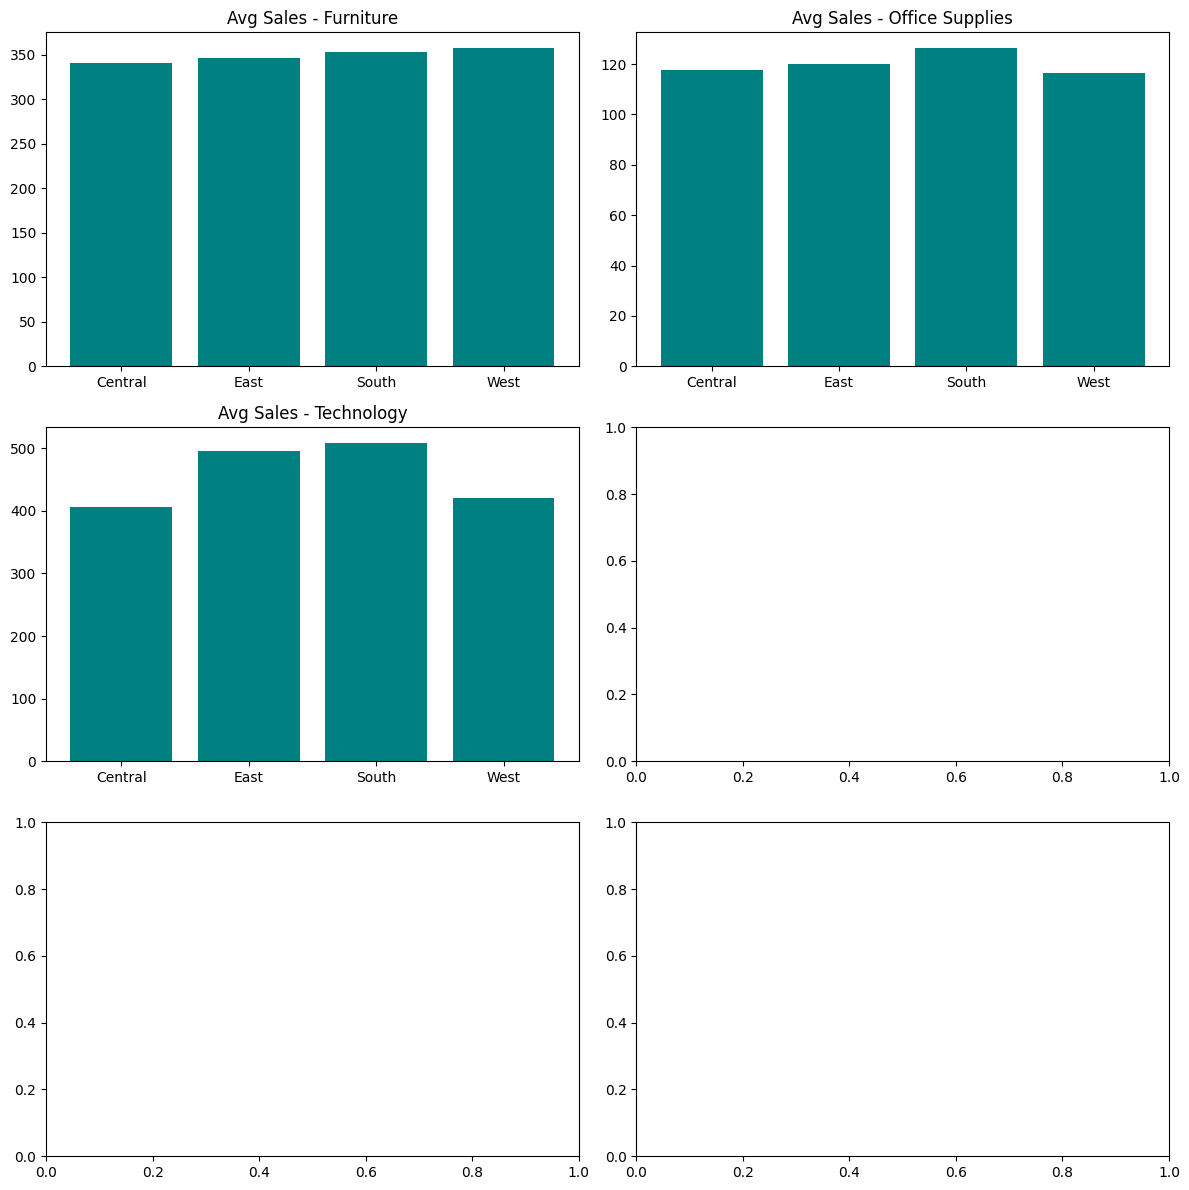

In [6]:
categories = df["Category"].unique()

fig, axs = plt.subplots(3, 2, figsize=(12,12))

for i, cat in enumerate(categories):
    row, col = divmod(i, 2)
    data = df[df["Category"] == cat].groupby("Region")["Sales"].mean()
    axs[row, col].bar(data.index, data.values, color="teal")
    axs[row, col].set_title(f"Avg Sales - {cat}")

plt.tight_layout()
plt.show()

Q5. Use GridSpec to design a layout: left column = line chart, right column = stacked histograms.

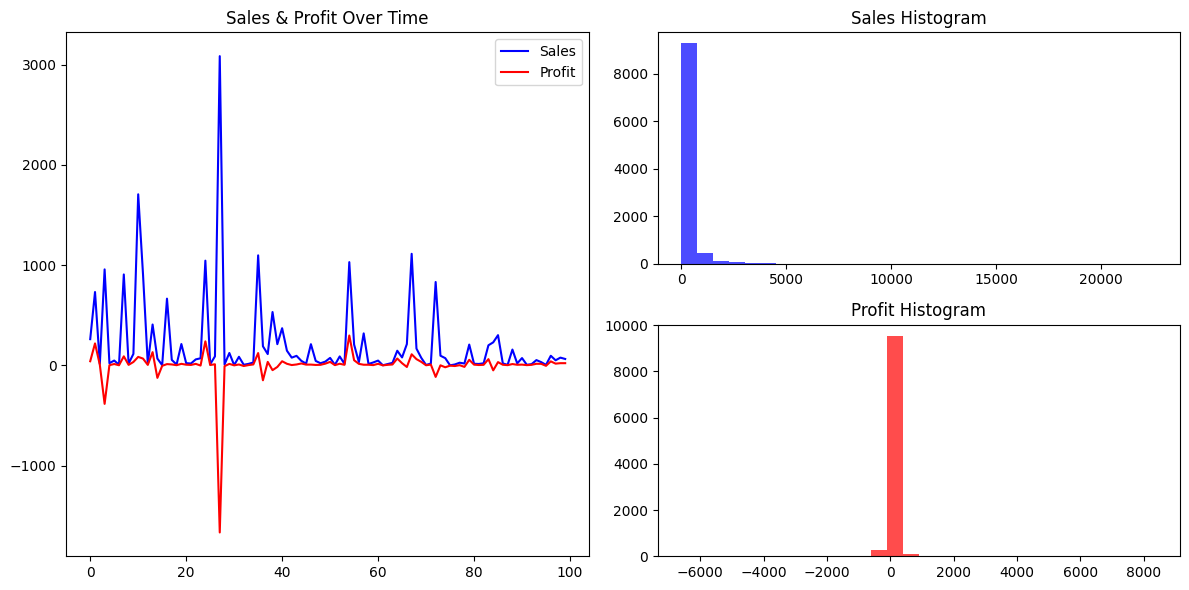

In [7]:
fig = plt.figure(figsize=(12,6))
gs = gridspec.GridSpec(2, 2, figure=fig)

# Left column spanning 2 rows
ax1 = fig.add_subplot(gs[:, 0])
ax1.plot(df["Sales"].head(100), label="Sales", color="blue")
ax1.plot(df["Profit"].head(100), label="Profit", color="red")
ax1.set_title("Sales & Profit Over Time")
ax1.legend()

# Right top
ax2 = fig.add_subplot(gs[0, 1])
ax2.hist(df["Sales"], bins=30, alpha=0.7, color="blue")
ax2.set_title("Sales Histogram")

# Right bottom
ax3 = fig.add_subplot(gs[1, 1])
ax3.hist(df["Profit"], bins=30, alpha=0.7, color="red")
ax3.set_title("Profit Histogram")

plt.tight_layout()
plt.show()

### Summary

Subplots and GridSpec are powerful tools in Matplotlib for organizing multiple plots within a single figure. While `plt.subplots()` is ideal for simple layouts like rows and columns, GridSpec provides much more flexibility, allowing plots to span across multiple rows or columns, making it possible to design complex dashboard-style arrangements. These techniques are essential in data science and AI/ML, where we often need to compare metrics, visualize multiple relationships, or display different aspects of the same dataset together. For example, analysts may place sales, profit, and discount trends in the same figure, or data scientists may display model performance metrics such as accuracy, loss, and confusion matrices side by side. Using these methods, we can build clean, professional, and insightful visualizations that communicate multiple dimensions of data in one view. Ultimately, subplot layouts and GridSpec transform simple charts into structured dashboards, making analysis more effective and storytelling more impactful.